# Pandas Play Pen

### Part of Track-2 - Section-3:  Pandas
#### Supported by the Blog Post: 'The Essence of Pandas"

Let's work with a real dataset and flex our Pandas muscle



### This is how it will go:

After working through the **'minsuk'** notebook, we now have some experience with basic Pandas manipulations. We can take the feature-rich **Census** dataset and carve it up, slice through it and pull out any number of aggregated insights we choose. Without even getting into visualization at this point, we will be learning alot about this dataset just by grouping, selecting and comparing data. We should also become familiar with the features of this dataset.

Hopefully, this puts us in a great position to make use of it to learn **visualization** in Track-4

### What we will cover in this notebook:

1. Reading a data file into a Pandas dataframe
2. Exploring the dataset
3. Hygiene (Cleaning)
4. Selecting using a number of techniques
5. Basic Analysis
6. Simple Visualizations

In [1]:
import pandas as pd
import numpy as np
import pickle

## Let's read in the csv file

In [2]:
# read in the csv data from Kaggle/datasets/census
# Replace census_path with your path to the data file
# Retrieve 
data_state_abbrev_path = "/Volumes/LaCie/datasets/census/US/"
census_path = "/Volumes/LaCie/datasets/census/us-census-demographic-data/"
census = pd.read_csv(census_path + "acs2015_census_tract_data.csv")

In [3]:
# Add new column for state abbreviation
# census['State Abbreviation'] = np.nan

In [4]:
census.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


### Start examining 

In [5]:
census.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [ ]:
census.head()

In [6]:
census.shape

(74001, 37)

In [7]:
print("There are %d columns in the Census dataset" %len(census.columns))
census.columns

There are 37 columns in the Census dataset


Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

## Exploration

In [8]:
# Print the total population with the ','s in the right places
print("Total Population of the U.S. = "+"{:,}".format(census["TotalPop"].sum())) # could have been max(), mean() etc.

Total Population of the U.S. = 320,098,094


### There are a couple of ways to extract stats from the dataframe:

1. Dump the df by slicing
2. Select out with conditional - x = loc[df["State"] == "StateName", "second column_name"].mean()
3. Create functions that return the answers you want - stat_data_df(state) and get_state_stat(df,stat,func) 

### 1: Slicing into DF

In [9]:
my_slice = census[["State","TotalPop"]][5:15]
print("Here are rows 5-15 of the State column:", my_slice)

Here are rows 5-15 of the State column:       State  TotalPop
5   Alabama      3851
6   Alabama      2761
7   Alabama      3187
8   Alabama     10915
9   Alabama      5668
10  Alabama      3286
11  Alabama      3295
12  Alabama      3829
13  Alabama      2869
14  Alabama      7455


In [10]:
cali = census[census.State == "California"]
# sum 'TotalPop' column of just the first 
print("Total Population of California in Thousands",cali["TotalPop"].sum())

Total Population of California in Thousands 38421464


In [11]:
sc_cty = cali[cali.County == "Santa Clara"]
print("Total Population of California's Santa Clara County",sc_cty["TotalPop"].sum())

Total Population of California's Santa Clara County 1868149


### 2: Using Loc

In [12]:
# select using .loc
# Print statement plus .format with selection by using .loc for "State" and two more selectors - Ca, TotalPop
print("Total Population of California = "+"{:,}".format(census.loc[census["State"] == "California","TotalPop"].sum()))

Total Population of California = 38,421,464


### 3: Functions to carve out what you want

We are creating these functions to do some housekeeping tasks that would be repetitive otherwise

### state_data_df Returns a df just for one state

In [13]:
# Utility function to return the data for one state in its own df
# May simplify processing if we are just interested in a single state
def state_data_df(state):
    df_state = census[census["State"]==str(state)]
    return df_state

### get_state_stat(df,stat,func) Returns a single stat for one state with func applied

In [14]:
# Function to extract and return a stat from the state with function applied
def get_state_stat(df,stat,func):
    if func == 'sum':
        state_stat = round(df[stat].sum(),2)
    elif func == 'mean':
        state_stat = round(df[stat].mean(),2)
    elif func == 'max':
        state_stat = round(df[stat].max(),2)
    elif func == 'min':
        state_stat = round(df[stat].min(),2)   
    return(state_stat)

### pop_comparison(state) prints a comparison of a state's population as a % of US. total population

In [15]:
# function prints the Total us pop, Pop of the state that is passed and a % of the U.S. for that state
def pop_comparison(state):
    us_pop = census["TotalPop"].sum()
    data_state = census[census["State"]==str(state)]
    state_pop = data_state["TotalPop"].sum()
    print("Population\n")
    print("Total U.S. = "+"{:,}".format(us_pop))
    print("Population of %s = "%state +"{:,}".format(state_pop))
    print("Which is %.2f %% of the total U.S. Population"%((state_pop/us_pop)*100))

In [16]:
# Scrape individual states into their own DF's to simplify things
maine_df = state_data_df("Maine")
cali_df = state_data_df("California")
newyork_df = state_data_df("New York")
florida_df = state_data_df("Florida")
texas_df = state_data_df("Texas")

#### Call the get_state_stat(df,stat,func) to return the answers to this query

In [17]:
# get some stats from selected states
stat_val = get_state_stat(maine_df,"Men", "mean")
print("Maine Men Mean: " +"{:,.2f}".format(stat_val))
stat_val = get_state_stat(cali_df,"Men", "mean")
print("Cali Men Mean: " +"{:,.2f}".format(stat_val))
stat_val = get_state_stat(newyork_df,"Men", "mean")
print("New York Men Mean: " +"{:,.2f}".format(stat_val))
stat_val = get_state_stat(florida_df,"Men", "mean")
print("Florida Men Mean: " +"{:,.2f}".format(stat_val))
stat_val = get_state_stat(texas_df,"Income","sum")
print("Total Texas Income sum : $ " +"{:,.2f}".format(stat_val))

Maine Men Mean: 1,815.87
Cali Men Mean: 2,369.01
New York Men Mean: 1,940.18
Florida Men Mean: 2,261.49
Total Texas Income sum : $ 290,491,643.00


In [18]:
# Look at one state - Maine
maine_men = get_state_stat(maine_df,"Men","mean")
print("Maine Men Mean: " +"{:,.2f}".format(maine_men))
maine_women = get_state_stat(maine_df,"Women","mean")
print("Maine Wommen Mean: " +"{:,.2f}".format(maine_women))
maine_income = get_state_stat(maine_df,"Income","mean")
print("Maine Income Mean: " +"{:,.2f}".format(maine_income))
maine_wfh = get_state_stat(maine_df,"WorkAtHome","sum")
print("Maine WFH Mean: " +"{:,.2f}".format(maine_wfh))
cali_wfh = get_state_stat(cali_df,"WorkAtHome","sum")
print("Cali WFH Mean: " +"{:,.2f}".format(cali_wfh))
print("Maine Mean WFH as % of Cali WFH : "+"{:,.2f}".format((maine_wfh/cali_wfh)*100)+" %")

Maine Men Mean: 1,815.87
Maine Wommen Mean: 1,896.70
Maine Income Mean: 49,181.97
Maine WFH Mean: 1,934.40
Cali WFH Mean: 43,960.20
Maine Mean WFH as % of Cali WFH : 4.40 %


In [19]:
# Call pop_comparison for five states

pop_comparison("California")
print("\n")
pop_comparison("Massachusetts")
print("\n")
pop_comparison("New York")
print("\n")
pop_comparison("Florida")
print("\n")
pop_comparison("Maine")

Population

Total U.S. = 320,098,094
Population of California = 38,421,464
Which is 12.00 % of the total U.S. Population


Population

Total U.S. = 320,098,094
Population of Massachusetts = 6,705,586
Which is 2.09 % of the total U.S. Population


Population

Total U.S. = 320,098,094
Population of New York = 19,673,174
Which is 6.15 % of the total U.S. Population


Population

Total U.S. = 320,098,094
Population of Florida = 19,645,772
Which is 6.14 % of the total U.S. Population


Population

Total U.S. = 320,098,094
Population of Maine = 1,329,100
Which is 0.42 % of the total U.S. Population


## Cleanup time

### Sort frame, drop nan values and non-essential columns

### What we will do in this section:

1. Drop nans and one of the non-essential columns
2. Sort

In [20]:
census.keys() # Similar to df.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [21]:
census = census.drop(['CensusTract'],axis=1)
census.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [22]:
census = census.dropna()
census.shape

(72727, 36)

In [23]:
census.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [24]:
census.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

### Groupby and sort so we can make a plot with Seaborn

Create a percentages list of columns that are numercial
round everything and put it into a percentage range

In [25]:
percentages = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific','Poverty', 'ChildPoverty', 
               'Professional', 'Service', 'Office','Construction','Production','Drive','Carpool','Transit',
               'Walk','OtherTransp','WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 
               'Unemployment']
for i in percentages:
    census[i] = round(census['TotalPop'] * census[i] / 100)   

In [26]:
# It will only have 52 rows, one for each state
census = census.groupby('State', as_index=False).sum()

### Plot with Seaborn



In [27]:
# Imports

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
# Let's perform a simple bar plot of the total population by state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

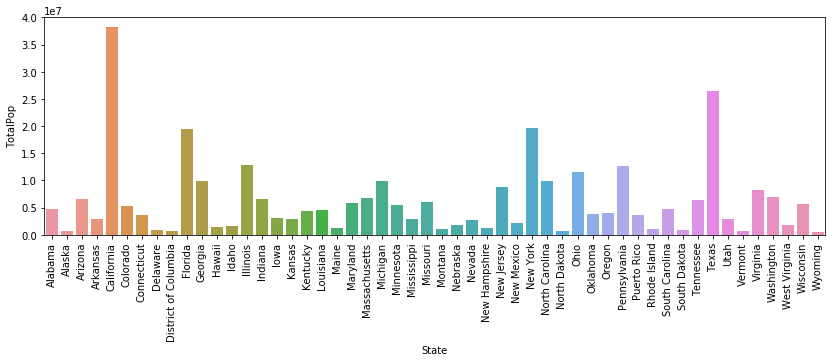

In [29]:
fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=census['State'], y=census['TotalPop'],data=census)
fig.axis(ymin=0, ymax=40000000)
plt.xticks(rotation=90)

* How about some conditional selection based on gender, race and population 

In [30]:
census[(census['Men']/census['Women'] < 1) & (census['Asian'] > census['Black']) | (census['TotalPop']>35000000)]

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
4,California,38221472,18933999,19287473,14692293.0,14798592.0,2127149.0,140367.0,5176065.0,138295.0,...,996420.0,942280.0,1976858.0,221289.7,17227654,29653010.0,5367271.0,3133738.0,67771.0,3882730.0
29,New Hampshire,1324201,653484,670717,42138.0,1210349.0,15467.0,1917.0,31109.0,230.0,...,40533.0,16685.0,79720.0,7773.3,698810,1051932.0,178401.0,92202.0,1569.0,76731.0
37,Oregon,3939233,1948453,1990780,485656.0,3042948.0,69110.0,36325.0,154411.0,14325.0,...,158402.0,128937.0,245917.0,18752.2,1789807,3058983.0,564227.0,309229.0,6701.0,374214.0
46,Vermont,626604,308573,318031,10701.0,586539.0,6739.0,1857.0,8672.0,185.0,...,37293.0,10097.0,41867.0,4160.3,326732,475152.0,91692.0,58318.0,1452.0,34751.0
48,Washington,6977372,3482455,3494917,834539.0,4939626.0,243173.0,80693.0,529058.0,42454.0,...,228502.0,141628.0,377110.0,37633.5,3258598,5383656.0,1159643.0,421363.0,12668.0,560386.0


In [ ]:
census[(census['White'] < census['Black'])]

In [ ]:
# more women than men
census[(census['Women'] > census['Men'])]

In [ ]:
# It looks like 42 out of 50 states have more Women than Men
census[(census["Women"] / census["Men"] >1)]

In [32]:
# Create new column for Poverty Ratio which is Poverty/TotalPop
census['Pov_Ratio'] = census['Poverty'] / census['TotalPop']

#### Plot the Poverty Ratio by state (Poverty/TotalPop)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

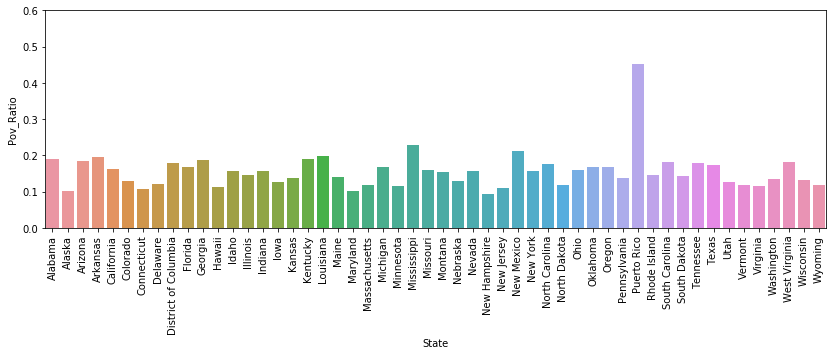

In [33]:
fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=census['State'], y=census['Pov_Ratio'],data=census)
fig.axis(ymin=0, ymax=.6)
plt.xticks(rotation=90)

#### Plot the Child_Pov_Ratio by state (ChildPoverty/TotalPop)

In [34]:
# Create new column for Child Poverty Ratio which is ChildPoverty/TotalPop
census['Child_Pov_Ratio'] = census['ChildPoverty'] / census['TotalPop']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

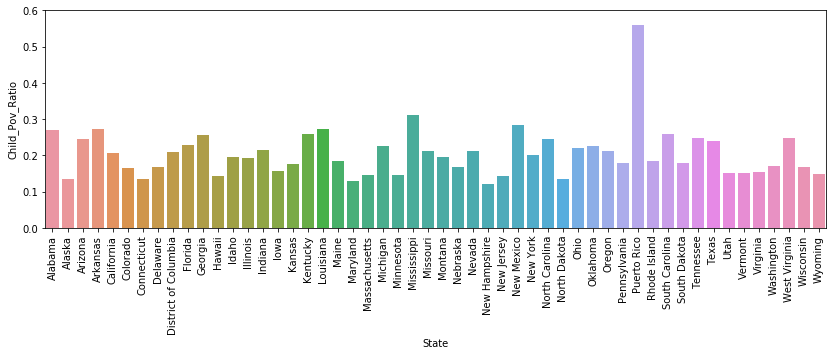

In [35]:
fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=census['State'], y=census['Child_Pov_Ratio'],data=census)
fig.axis(ymin=0, ymax=.6)
plt.xticks(rotation=90)

#### Interesting statistic to examine would be the ratio of child vs. non-child poverty as a % of TotalPop




In [ ]:
# import seaborn as sns
# sns.set(style="whitegrid")

Create array of abbreviations based on the 

In [36]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

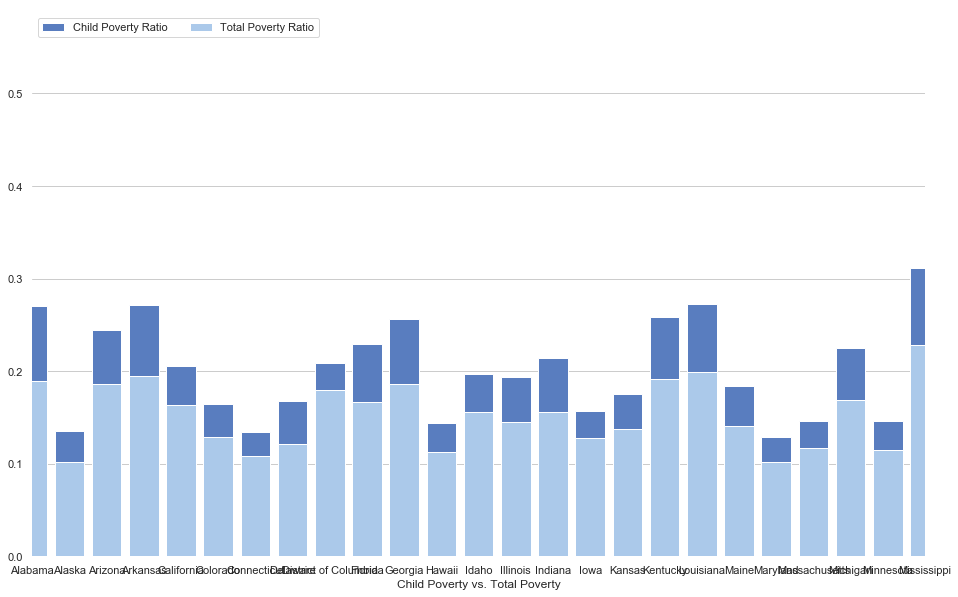

In [37]:
f, ax = plt.subplots(figsize=(16, 10))

sns.set_color_codes("muted")
sns.barplot(x="State", y="Child_Pov_Ratio", data=census,
            label="Child Poverty Ratio", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="State", y="Pov_Ratio", data=census,
            label="Total Poverty Ratio", color="b")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Child Poverty vs. Total Poverty")
sns.despine(left=True, bottom=True)

### How about a cleaner looking plot ?

#### Let's use State Abbreviations instead of names so it tightens up the x-axis

We pickled the dictionary containing the key:value of state:abbreviation
Now we can map it into the dataframe so it will be used as the 'X' axis in the plot

In [38]:
# Map the us_state_abbrev values to a new column called 'StAbbv'
# unpickle the state abbreviations from a saved pickle file

with open('state_abbs.pickle', 'rb') as handle:
    us_state_abbrev = pickle.load(handle)

In [39]:
# This statement will add a new column to the dataframe called 'StAbbv' which will hold the abbreviated state names
census['StAbbv'] = census["State"].map(us_state_abbrev)

In [40]:
# Check out the new column
census.tail()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Pov_Ratio,Child_Pov_Ratio,StAbbv
47,Virginia,8202003,4030052,4171951,706305.0,5203049.0,1549383.0,16852.0,485435.0,4975.0,...,51127.1,3977156,6094519.0,1687052.0,410302.0,10354.0,545816.0,0.116528,0.153983,VA
48,Washington,6977372,3482455,3494917,834539.0,4939626.0,243173.0,80693.0,529058.0,42454.0,...,37633.5,3258598,5383656.0,1159643.0,421363.0,12668.0,560386.0,0.134609,0.170959,WA
49,West Virginia,1851420,913631,937789,25426.0,1713466.0,60363.0,2705.0,13296.0,469.0,...,12268.1,751252,1415982.0,351294.0,81958.0,2157.0,147254.0,0.181494,0.248899,WV
50,Wisconsin,5726162,2842827,2883335,363768.0,4718671.0,352947.0,45985.0,140911.0,1083.0,...,30618.8,2875637,4716720.0,702451.0,296464.0,10503.0,373634.0,0.130826,0.167541,WI
51,Wyoming,579679,295561,284118,55681.0,489646.0,5963.0,11006.0,5161.0,383.0,...,2420.7,293949,416467.0,124583.0,37077.0,1527.0,28565.0,0.116970,0.148206,WY


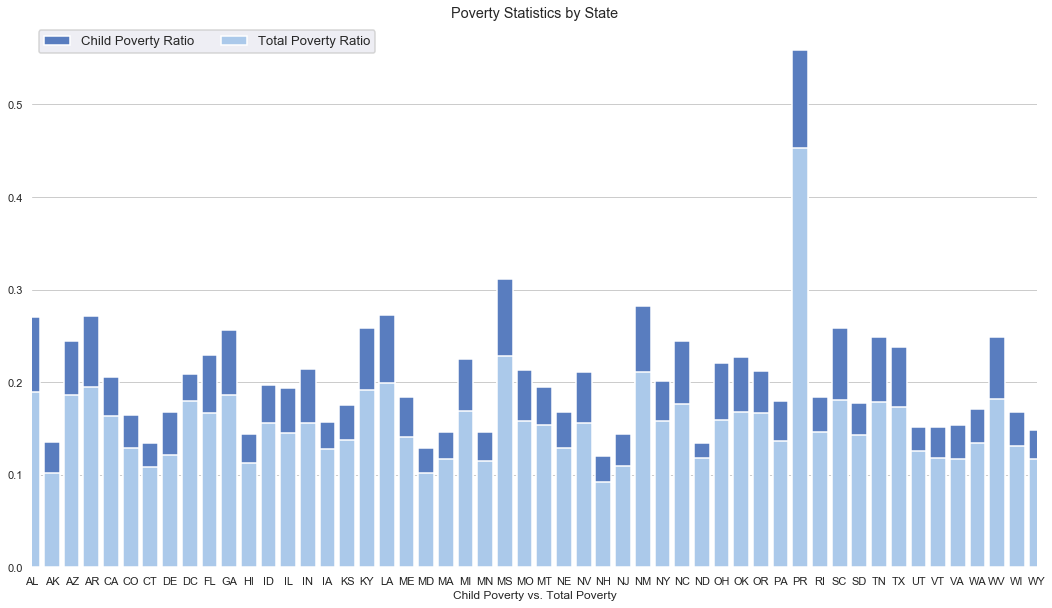

In [41]:
# Now the cleaner plot with the state abbreviations

# Set up the figure
f, ax = plt.subplots(figsize=(18, 10))
sns.set()
sns.set_context("talk",font_scale=.8)
sns.set_color_codes("muted")

# Now the two barplots with the two different stats combined
# Child Poverty Ratio
sns.barplot(x="StAbbv", y="Child_Pov_Ratio", data=census,
            label="Child Poverty Ratio", color="b")

# Total Poverty Ratio
sns.set_color_codes("pastel")
sns.barplot(x="StAbbv", y="Pov_Ratio", data=census,
            label="Total Poverty Ratio", color="b").set_title("Poverty Statistics by State")

ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlim=(0, 51), ylabel="",
       xlabel="Child Poverty vs. Total Poverty")
sns.despine(left=True, bottom=True)



